In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
rs =123

In [4]:
data = pd.read_csv(r'C:\Users\mahdi\Desktop\Github\Cancer_Classification_Model\cleaned_data.csv')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [5]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [6]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = rs)

In [7]:
model = DecisionTreeClassifier(random_state=rs)

In [8]:
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

In [9]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [10]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9298245614035088,
 'recall': 0.9761904761904762,
 'precision': 0.8541666666666666,
 'f1score': 0.9111111111111111}

In [11]:
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()

In [13]:
feature_names = x.columns.values

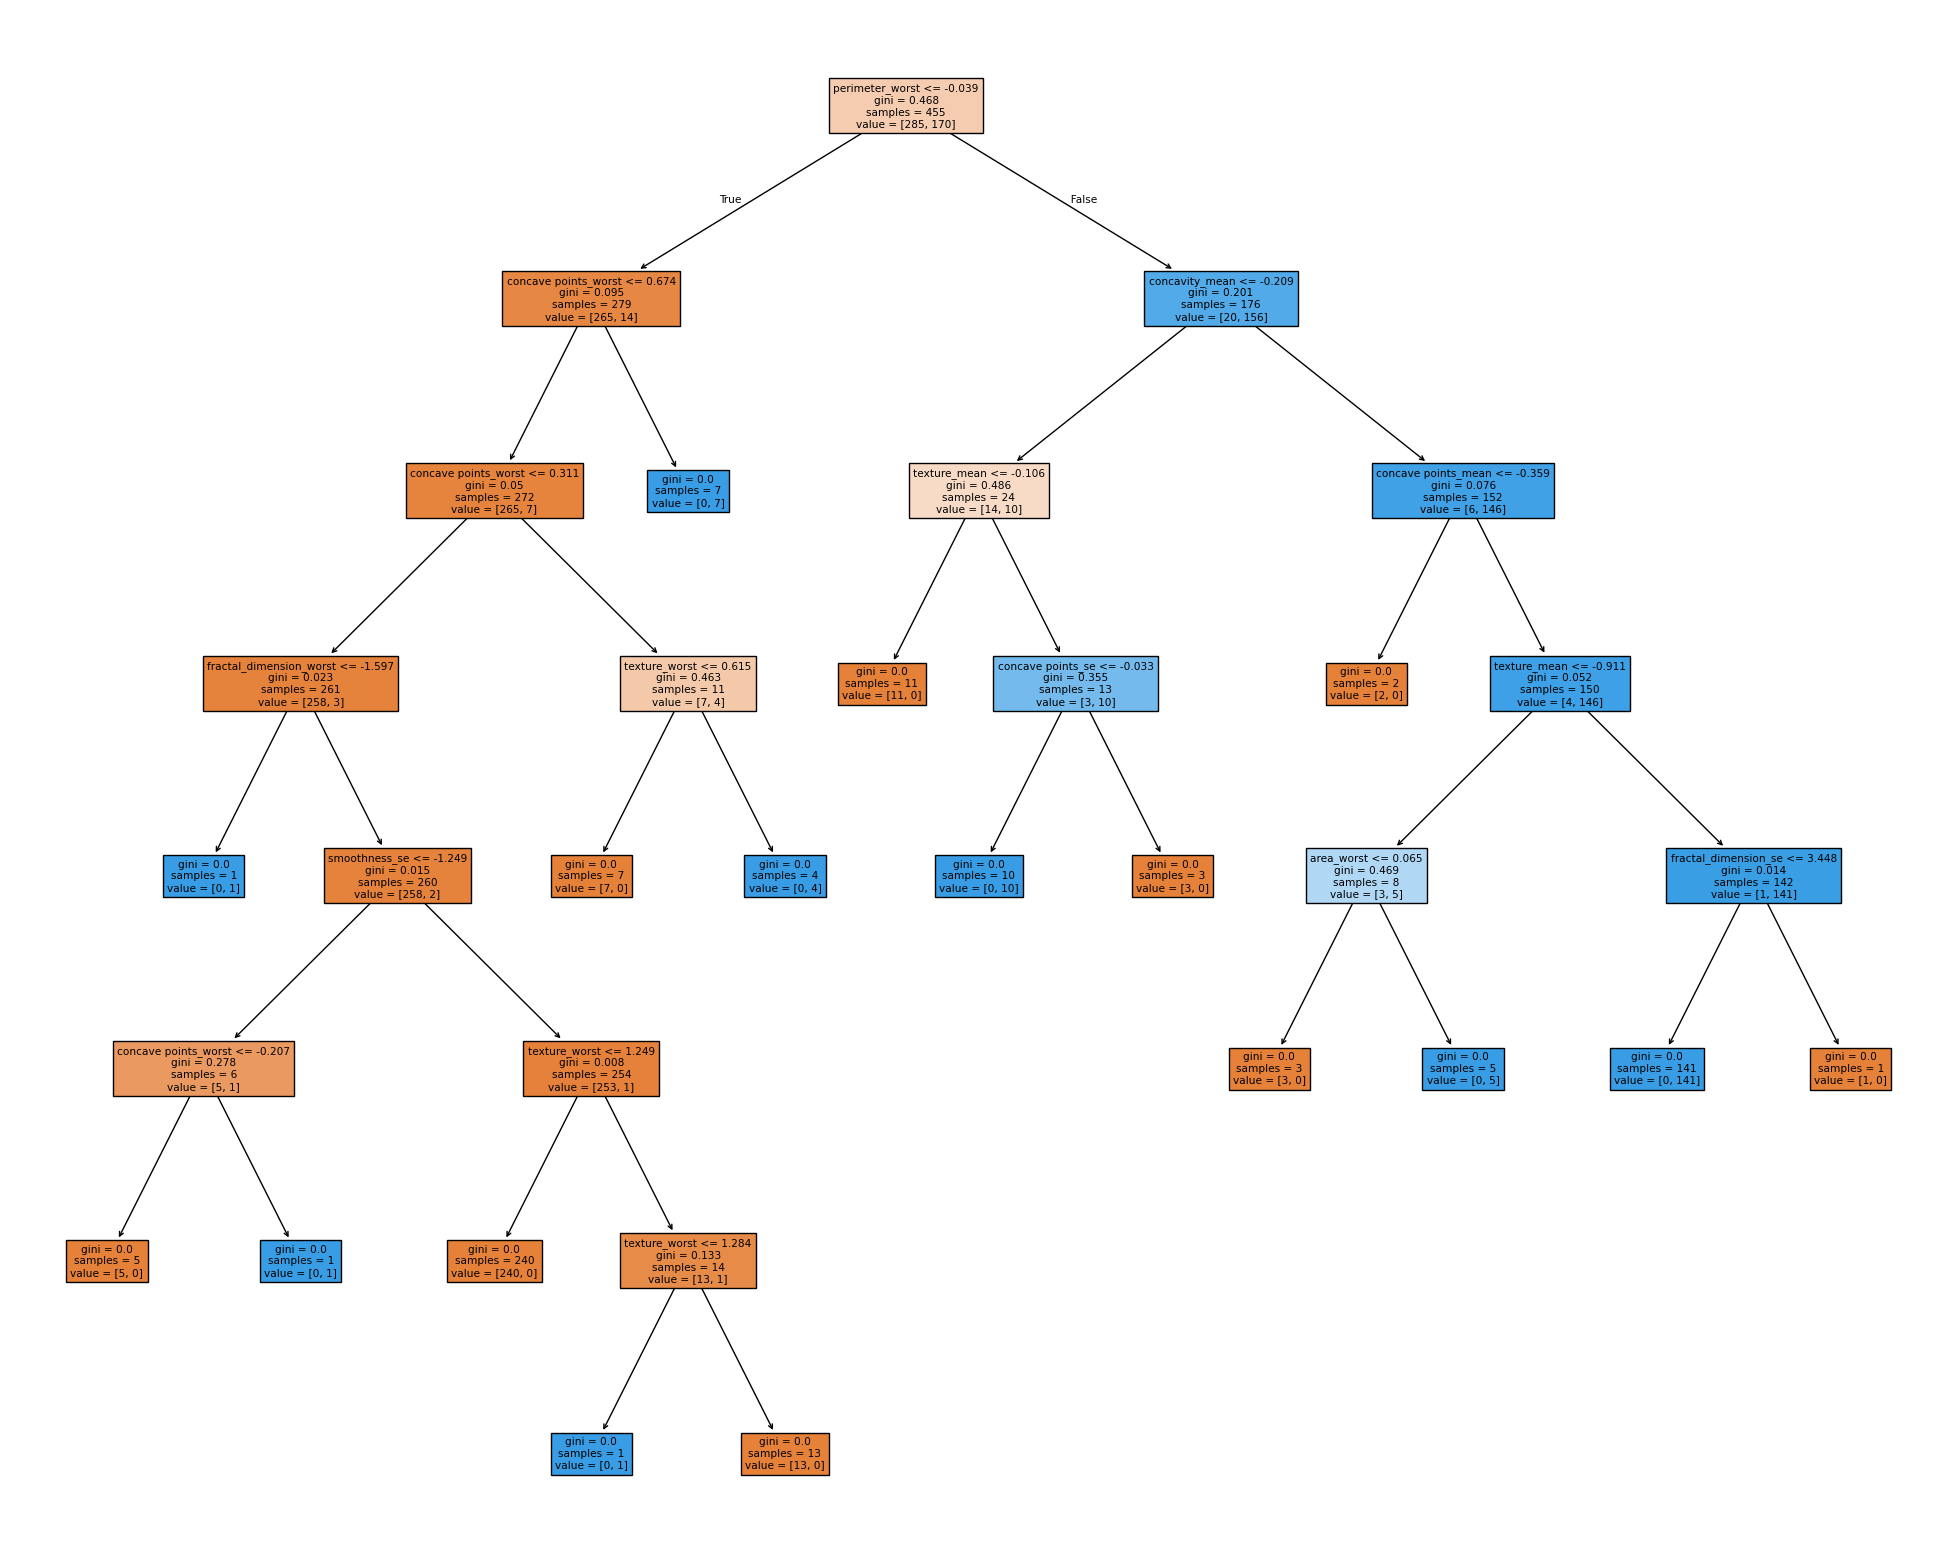

In [14]:
plot_decision_tree(model, feature_names)

In [15]:
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, random_state=rs)

In [16]:
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9210526315789473,
 'recall': 0.9761904761904762,
 'precision': 0.8367346938775511,
 'f1score': 0.9010989010989011}

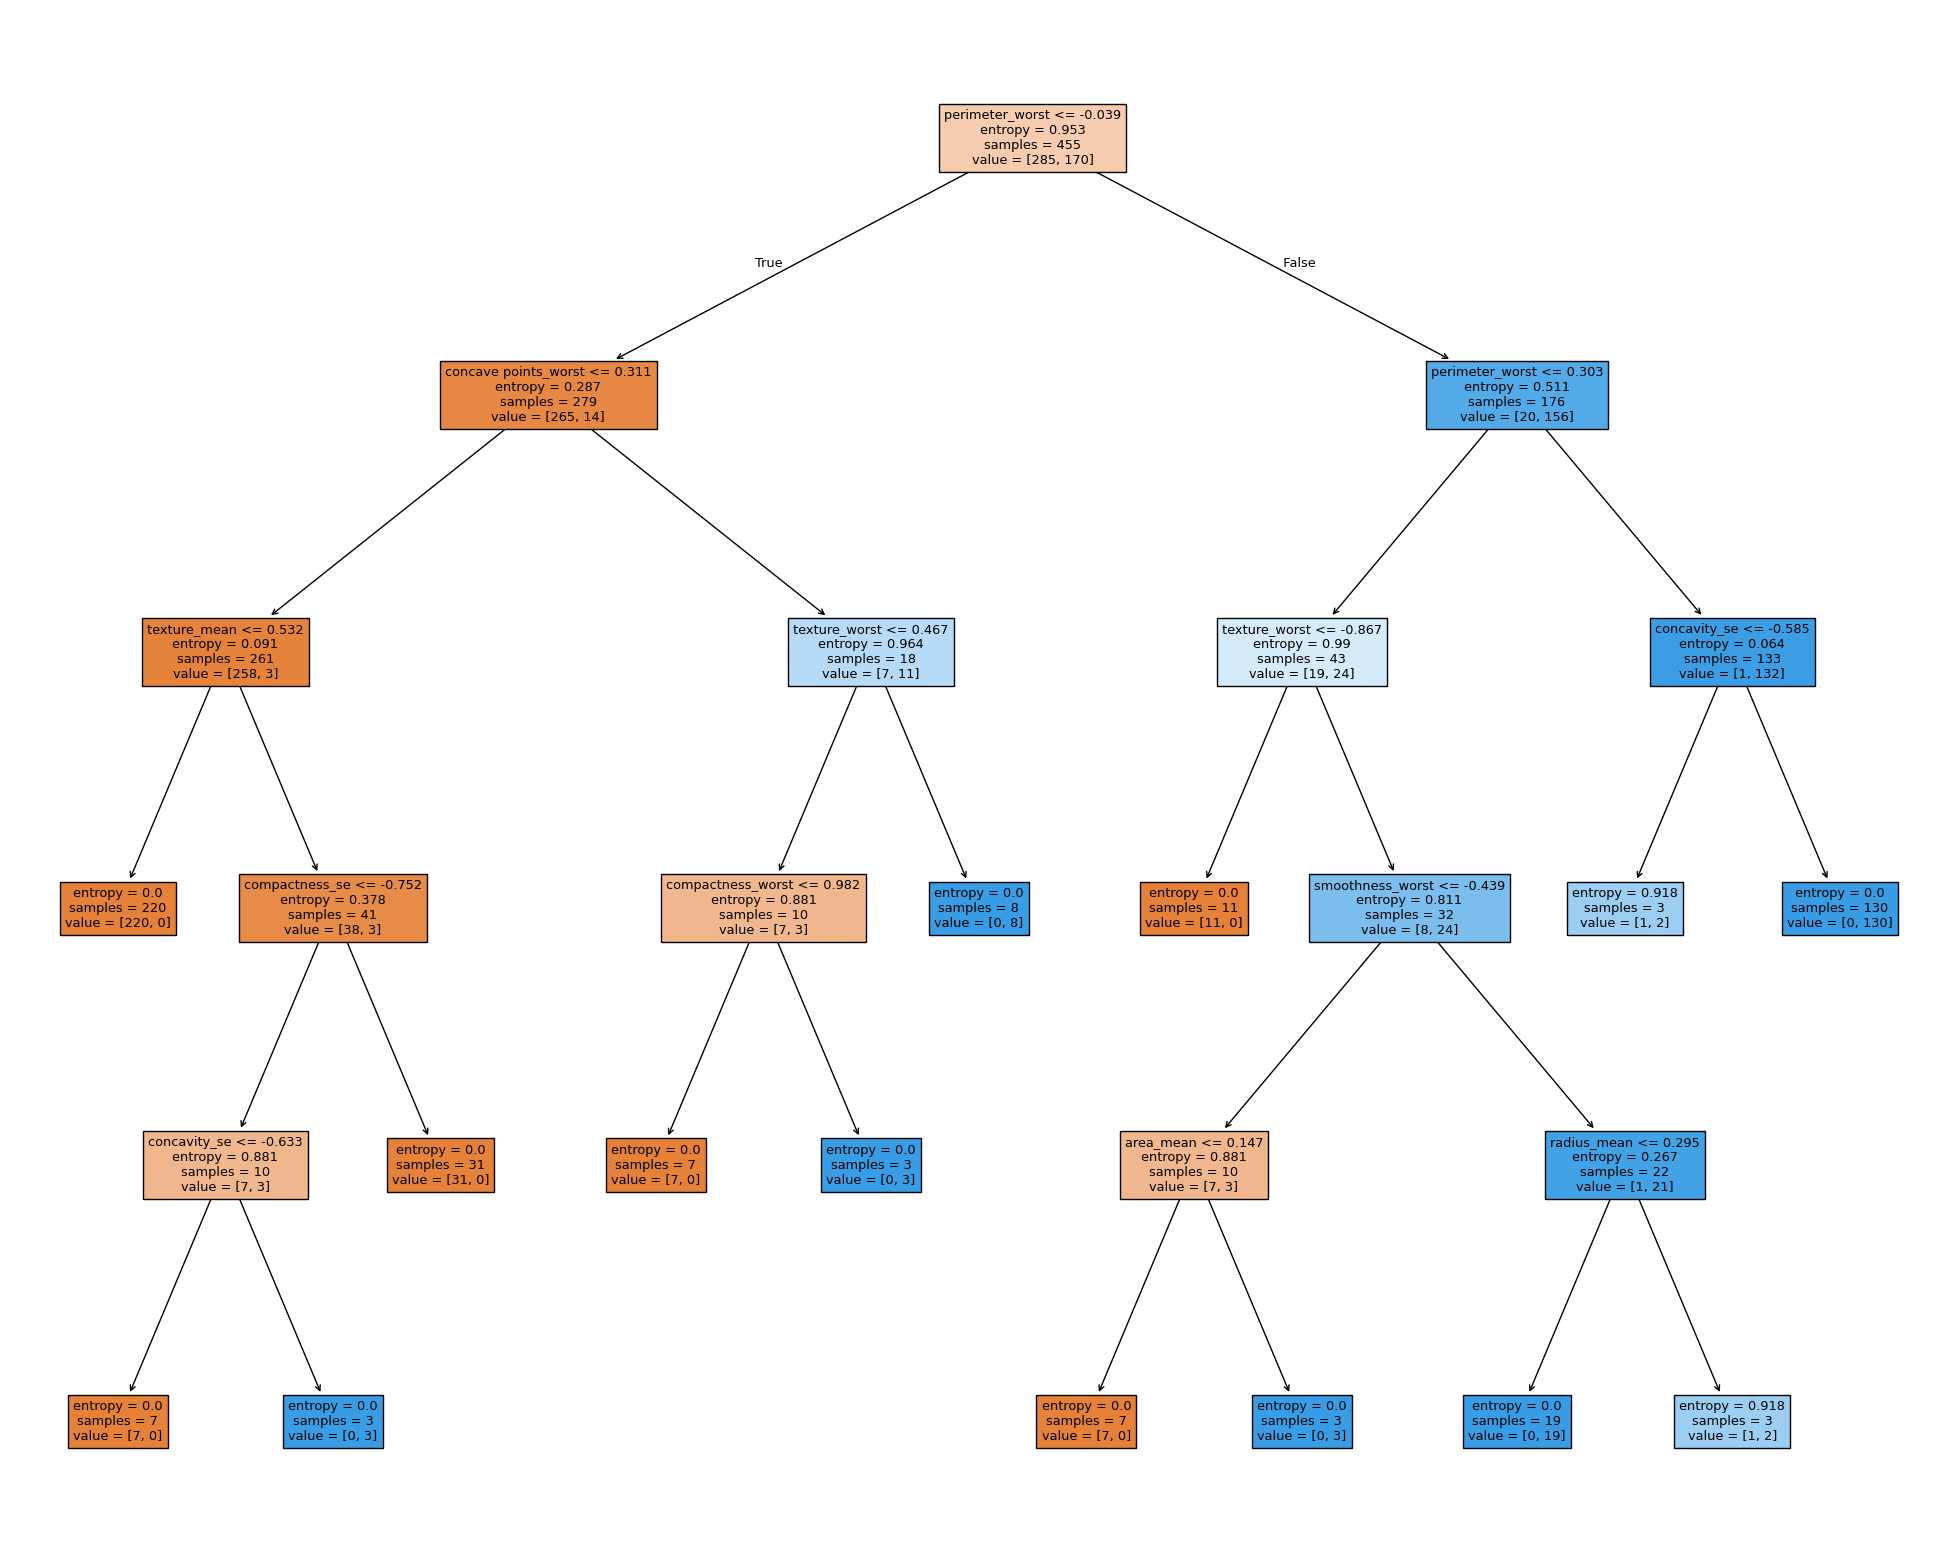

In [17]:
plot_decision_tree(custom_model, feature_names)

In [18]:
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=5, random_state=rs)

In [19]:
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.8947368421052632,
 'recall': 0.9523809523809523,
 'precision': 0.8,
 'f1score': 0.8695652173913043}

In [20]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [22]:
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [23]:
best_params

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

In [25]:
## Type your code here
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)


{'accuracy': 0.9210526315789473,
 'recall': 0.9761904761904762,
 'precision': 0.8367346938775511,
 'f1score': 0.9010989010989011}

In [28]:
from imblearn.over_sampling import  SMOTE
smote_sampler = SMOTE(random_state = rs)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
optimized_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, random_state=rs)
optimized_model.fit(X_smo, y_smo)
preds = optimized_model.predict(X_test)

In [29]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision_test, recall_test, f_beta_test, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
accuracy_test = accuracy_score(y_test, preds)
train_preds = optimized_model.predict(X_train)
precision_train, recall_train, f_beta_train, _ = precision_recall_fscore_support(y_train, train_preds, beta=5, pos_label=1, average='binary')
accuracy_train = accuracy_score(y_train, train_preds)


print("Test Set Results:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F-Score: {f_beta_test:.2f}")


print("\nTraining Set Results:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F-Score: {f_beta_train:.2f}")

Test Set Results:
Accuracy: 0.92
Precision: 0.84
Recall: 0.98
F-Score: 0.97

Training Set Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F-Score: 1.00
